<a href="https://colab.research.google.com/github/ekolonsky/okj/blob/main/Okudjava_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частотный анализ текстов песен Булата Окуджавы

## Загрузка корпуса слов

In [3]:
import base64
import requests

# загружаем тексты песен (корпус)
req = requests.get("https://raw.githubusercontent.com/ekolonsky/okj/main/okudjava_songs.txt")
corpus = req.text

In [4]:
# очищаем от знаков препинания
import string

spec_chars = string.punctuation + '\xa0«»\t—…' 

def remove_chars_from_text(text, chars):
    return "".join([ch.lower() for ch in text if ch not in chars])

corpus = remove_chars_from_text(corpus, spec_chars)

In [5]:
# Установим библиотеку для анализа текстов NLTK
!pip install nltk

In [6]:
# Библиотека для морфологического анализа
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 8.2 MB 9.2 MB/s 


In [7]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')

Стоп-слова, такие как союзы, предлоги, часто встречаются в каждом тексте. Поэтому их исключают из корпуса текста.

In [9]:
russian_stopwords = stopwords.words("russian")  # союзы, междометия
russian_stopwords.extend(['что-то', 'свой','словно','который','пусть','наш','чтоть', 'всё','это', 'весь','ещё', 'ах',\
                          'твой','ваш','её','его'])

Теперь для каждого слова в корпусе текстов выполним его морфологический разбор: определим, какая это часть речи
NOUN - существительное
ADJF - прилагательное
VERB - глагол
и приведем к нормальной форме. Для существительных это ед.число, именительный падеж. Для глаголов - инфинитивная форма.
Исключим из корпуса слов стоп-слова. 

In [10]:
# Разбиваем текст на слова
tokens = word_tokenize(corpus)
# Отбираем существительные, прилагательные и глаголы
tokens = [w for w in tokens if morph.parse(w)[0].tag.POS in ['NOUN', 'ADJF','VERB']]
# приводим слова к нормальной форме, чтобы считать одним словом разные его числа, лица, падежи, склонения
tokens = [morph.parse(w)[0].normal_form for w in tokens]
# исключаем стоп-слова
tokens = [w for w in tokens if w not in russian_stopwords]

## Частотный анализ

In [11]:
 # Выполняем частотный анализ
from nltk.probability import FreqDist
text_tokens = nltk.Text(tokens)
fdist = FreqDist(text_tokens)

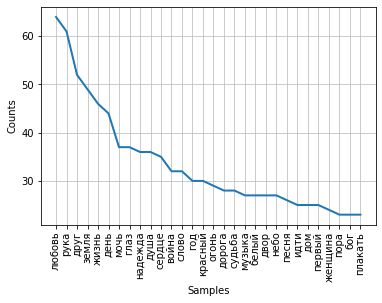

In [12]:
# Графическое представление
fdist.plot(30,cumulative=False)

In [13]:
# Представление отсортированным списком
fdist.most_common(30)

[('любовь', 64),
 ('рука', 61),
 ('друг', 52),
 ('земля', 49),
 ('жизнь', 46),
 ('день', 44),
 ('мочь', 37),
 ('глаз', 37),
 ('надежда', 36),
 ('душа', 36),
 ('сердце', 35),
 ('война', 32),
 ('слово', 32),
 ('год', 30),
 ('красный', 30),
 ('огонь', 29),
 ('дорога', 28),
 ('судьба', 28),
 ('музыка', 27),
 ('белый', 27),
 ('двор', 27),
 ('небо', 27),
 ('песня', 26),
 ('идти', 25),
 ('дом', 25),
 ('первый', 25),
 ('женщина', 24),
 ('пора', 23),
 ('бог', 23),
 ('плакать', 23)]

## Облако слов

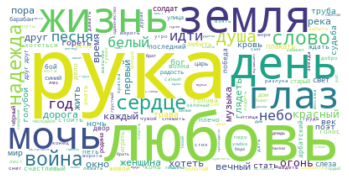

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color="white").generate(" ".join(text_tokens))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()